# 一起来打怪之 Credit Scoring 练习

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [110]:
## 加载相应的包和导入数据
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [111]:
data.shape

(112915, 11)

------------
## Drop na

In [112]:
data.isnull().sum(axis=0)  # 检查数据中的空值

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [113]:
data.dropna(inplace=True)  # 删除数据中空值所在的行
data.shape

(108648, 11)

---------
## Create X and y

In [114]:
y = data['SeriousDlqin2yrs']  # 挑选 SeriousDlqin2yrs 数据作为 y (即模型分类需要得到的数据)
X = data.drop('SeriousDlqin2yrs', axis=1)  # 删除 data 中 SeriousDlqin2yrs 列的数据, 剩余数据作为模型输入

In [115]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 切分数据集

In [116]:
## 将数据分割为训练集和测试集
from sklearn.model_selection import train_test_split

# 使用 train_tset_split 进行数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
# shuffle=True 表示将数据随机打乱
# test_size=0.3 表示 70% 的数据作为训练集, 30% 的数作为测试集

X_train.shape, X_test.shape, y_train.shape, y_test.shape  #检查数据维度

((76053, 10), (32595, 10), (76053,), (32595,))

- 对数据特征进行标准化

In [117]:
## 特征标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # 对数据每一列做一个归一化
sc.fit(X_train)

StandardScaler()

In [118]:
## 计算 sc 的均值
sc.mean_

array([4.89315096e+00, 5.13648903e+01, 3.87650717e-01, 3.06471367e-01,
       7.02033792e+03, 8.66193313e+00, 2.22818298e-01, 1.01379301e+00,
       1.97309771e-01, 8.53746729e-01])

In [119]:
## 计算 sc 的标准缩放因子
sc.scale_

array([1.94920750e+02, 1.44424848e+01, 3.64406418e+00, 2.23123455e-01,
       1.72448589e+04, 5.11056274e+00, 3.61393850e+00, 1.07131070e+00,
       3.59638647e+00, 1.14658846e+00])

In [120]:
## 将 X_train 和 X_test 标准化为均值为 0, 标准差为 1
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [121]:
## 计算 X_train 和 X_test 的均值和标准差
## 用于与后面计算得到的 X_train_std 和 X_test_std 的均值和标准差进行比较
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))
print(np.mean(X_test, axis=0))
print(np.std(X_test, axis=0))

RevolvingUtilizationOfUnsecuredLines       4.893151
age                                       51.364890
NumberOfTime30-59DaysPastDueNotWorse       0.387651
DebtRatio                                  0.306471
MonthlyIncome                           7020.337922
NumberOfOpenCreditLinesAndLoans            8.661933
NumberOfTimes90DaysLate                    0.222818
NumberRealEstateLoansOrLines               1.013793
NumberOfTime60-89DaysPastDueNotWorse       0.197310
NumberOfDependents                         0.853747
dtype: float64
RevolvingUtilizationOfUnsecuredLines      194.920750
age                                        14.442485
NumberOfTime30-59DaysPastDueNotWorse        3.644064
DebtRatio                                   0.223123
MonthlyIncome                           17244.858893
NumberOfOpenCreditLinesAndLoans             5.110563
NumberOfTimes90DaysLate                     3.613938
NumberRealEstateLoansOrLines                1.071311
NumberOfTime60-89DaysPastDueNotWorse     

In [122]:
## 计算 X_train_std 和 X_test_std 的均值和标准差, 用于检验
print(np.mean(X_train_std, axis=0))
print(np.std(X_train_std, axis=0))
print(np.mean(X_test_std, axis=0))
print(np.std(X_test_std, axis=0))

[ 9.80986776e-19  1.61535822e-16  1.49483699e-18 -1.55182765e-16
 -1.45279470e-17 -1.64525496e-16 -6.44648453e-18 -3.05974447e-18
  9.76315410e-18  1.08749391e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.01875163 -0.00082761 -0.00824625 -0.00350084 -0.01081841  0.01116763
 -0.00860606  0.00476574 -0.00801295  0.00821783]
[1.89409543 1.00254072 0.88665629 0.99699979 0.40389417 1.01134743
 0.8838623  1.01965293 0.88365865 1.00850757]


----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类

### Logistic Regression

In [123]:
## 使用 Logistic regression 进行分类
from sklearn.linear_model import LogisticRegression

LR_Model = LogisticRegression()
LR_Model.fit(X_train_std, y_train)

LogisticRegression()

### Decision Tree

In [124]:
## 使用 Decision Tree 进行分类
from sklearn.tree import DecisionTreeClassifier

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train_std, y_train)

DecisionTreeClassifier()

### Random Forest

In [125]:
## 使用 Random Forest 进行分类
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier()
RF_Model.fit(X_train_std, y_train)

RandomForestClassifier()

### SVM

In [126]:
## 使用 SVM 进行分类
from sklearn.svm import SVC

SVM_Model = SVC(kernel='linear', C=1.0, random_state=0)
SVM_Model.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

### KNN

In [127]:
## 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train_std, y_train)

KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

In [128]:
## 从 sklearn.metrics 导入 accuracy_score 用于计算准确度
from sklearn.metrics import accuracy_score

### Logistic Regression

In [129]:
## Logistic regression 模型的预测与准确度计算
# 预测
LR_Predict = LR_Model.predict(X_test_std)

# 准确度计算
LR_Accuracy = accuracy_score(y_test, LR_Predict)

print(f"Logistic regression model accuracy: {LR_Accuracy * 100:.2f}%")

Logistic regression model accuracy: 93.44%


### Decision Tree

In [130]:
## Decision Tree 模型的预测与准确度计算
# 预测
DT_Predict = DT_Model.predict(X_test_std)

# 准确度计算
DT_Accuracy = accuracy_score(y_test, DT_Predict)

print(f"Decision tree model accuracy: {DT_Accuracy * 100:.2f}%")

Decision tree model accuracy: 89.43%


### Random Forest

In [131]:
## Random Forest 模型的预测与准确度计算
# 预测
RF_Predict = RF_Model.predict(X_test_std)

# 准确度计算
RF_Accuracy = accuracy_score(y_test, RF_Predict)

print(f"Random forest model accuracy: {RF_Accuracy * 100:.2f}%")

Random forest model accuracy: 93.57%


### SVM

In [132]:
## SVM 模型的预测与准确度计算
# 预测
SVM_Predict = SVM_Model.predict(X_test_std)

# 准确度计算
SVM_Accuracy = accuracy_score(y_test, SVM_Predict)

print(f"SVM model accuracy: {SVM_Accuracy * 100:.2f}%")

SVM model accuracy: 93.35%


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [133]:
## KNN 模型的预测与准确度计算
# 预测
KNN_Predict = KNN_Model.predict(X_test_std)

# 准确度计算
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)

print(f"KNN model accuracy: {KNN_Accuracy * 100:.2f}%")

KNN model accuracy: 93.35%


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

### 混淆矩阵（Confusion Matrix）相关学习链接

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### 计算各模型的混淆矩阵 (Confusion Matrix)

In [134]:
# 导入包
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

- Logistic Regression

Logistic regression confusion matrix: 
 [[30374    51]
 [ 2086    84]]


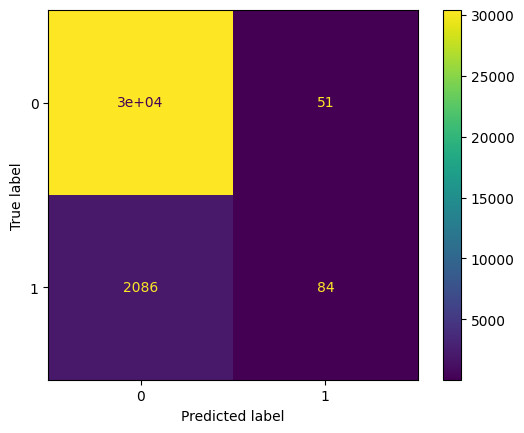

In [135]:
## 计算 Logistic Regression 模型的混淆矩阵
LR_CM = confusion_matrix(y_test, LR_Predict)

print("Logistic regression confusion matrix: \n", LR_CM)

LR_CM_Display = ConfusionMatrixDisplay(LR_CM).plot()

- Decision Tree

Decision tree confusion matrix: 
 [[28569  1856]
 [ 1590   580]]


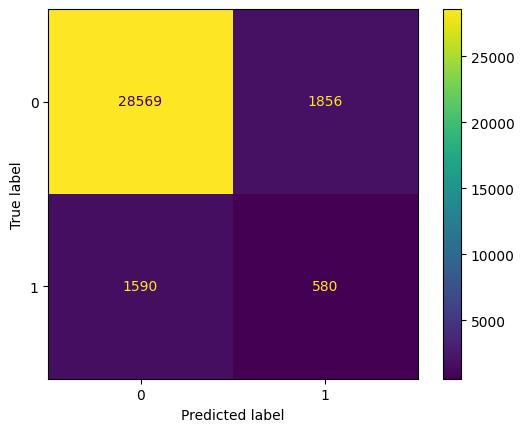

In [136]:
## 计算 Decision Tree 模型的混淆矩阵
DT_CM = confusion_matrix(y_test, DT_Predict)

print("Decision tree confusion matrix: \n", DT_CM)

DT_CM_Display = ConfusionMatrixDisplay(DT_CM).plot()

- Random Forest

Random forest confusion matrix: 
 [[30130   295]
 [ 1802   368]]


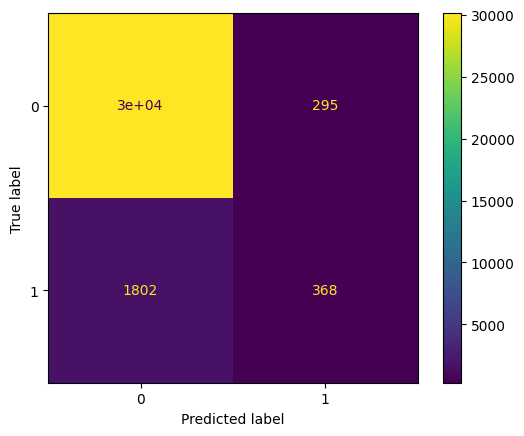

In [137]:
## 计算 Random Forest 模型的混淆矩阵
RF_CM = confusion_matrix(y_test, RF_Predict)

print("Random forest confusion matrix: \n", RF_CM)

RF_CM_Display = ConfusionMatrixDisplay(RF_CM).plot()

- SVM

SVM confusion matrix: 
 [[30409    16]
 [ 2152    18]]


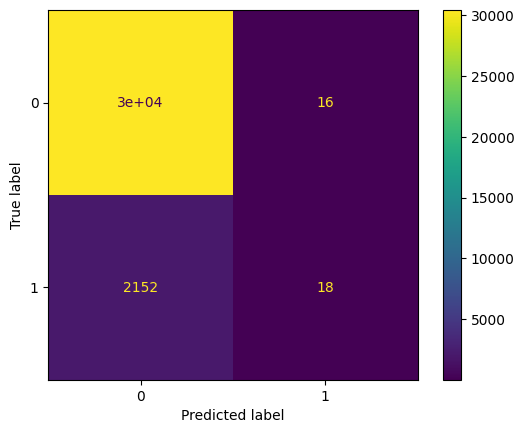

In [138]:
## 计算 SVM 模型的混淆矩阵
SVM_CM = confusion_matrix(y_test, SVM_Predict)

print("SVM confusion matrix: \n", SVM_CM)

SVM_CM_Display = ConfusionMatrixDisplay(SVM_CM).plot()

- KNN

SVM confusion matrix: 
 [[30187   238]
 [ 1929   241]]


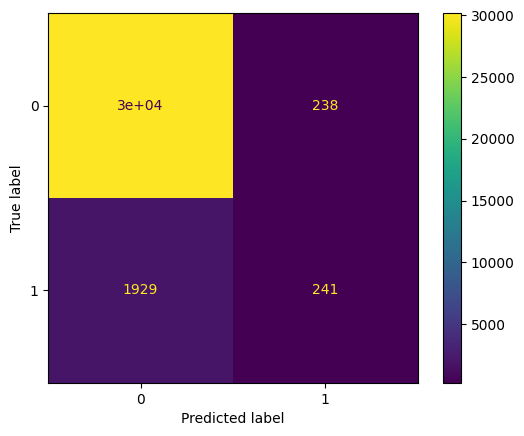

In [139]:
## 计算 KNN 模型的混淆矩阵
KNN_CM = confusion_matrix(y_test, KNN_Predict)

print("SVM confusion matrix: \n", KNN_CM)

KNN_CM_Display = ConfusionMatrixDisplay(KNN_CM).plot()

### 模型评估  
评估方法参考：https://blog.csdn.net/sinat_16388393/article/details/91427631

In [140]:
## 模型评估
CMs = [LR_CM, DT_CM, RF_CM, SVM_CM, KNN_CM] # 所有模型的混淆矩阵
Models = ["Logistc Regress", "Decision Tree", "Random Forest", "SVM", "KNN"] # 所有的模型

Model_Evaluation = [ ] 

## 循环进行模型评估指标的计算
## 评估指标包括: 准确率(Accuracy)、精确率(Precision)、灵敏度(Sensitivity)、特异度(Specificity)、F1_Score
for i, cm in enumerate(CMs):
    TP = cm[0, 0] # True Positive
    TN = cm[1, 1] # False Negative
    FP = cm[0, 1] # False Positive
    FN = cm[1, 0] # True Negative
    
    ## 二级指标
    Accuracy = (TP + TN)/(TP + TN + FP + FN) # 计算精度
    Precision = TP / (TP+FP) # 计算准确度
    Sensitivity = TP / (TP + FN) # 计算灵敏度
    Specificity = TN / (TN + FP) # 计算灵异度
    
    ## 三级指标
    F1_Score = 2 * Precision * Sensitivity / (Precision + Sensitivity) # 计算 F1_Score
    
    
    ## 将计算结果写入 Model_Evaluation 中
    Model_Evaluation.append({
        'Model': Models[i],
        'Accuracy': Accuracy,
        'Precision': Precision,
        'Sensitivity': Sensitivity,
        'Specificity': Specificity,
    })
    
## 输出评价结果    
print(pd.DataFrame(Model_Evaluation))
    

             Model  Accuracy  Precision  Sensitivity  Specificity
0  Logistc Regress  0.934438   0.998324     0.935736     0.622222
1    Decision Tree  0.894278   0.938998     0.947279     0.238095
2    Random Forest  0.935665   0.990304     0.943568     0.555053
3              SVM  0.933487   0.999474     0.933909     0.529412
4              KNN  0.933517   0.992177     0.939936     0.503132


---
## 练习5：调整模型的标准

银行通常会有更严格的要求，因为 fraud 带来的后果通常比较严重，一般我们会调整模型的标准。  
    
比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为 0.3，再看看这时的评估指标(主要是准确率和召回率)。  

### 调整阈值为 0.3, 重新预测

In [141]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix

- 定义两个重新预测的函数, 避免重复工作

In [142]:
## 定义 NewPredictDF 函数(使用 decision_function), 用于计算调整模型阈值后的评价指标
def NewPredictDF(Model, Model_Name):
    # 计算模型的预测概率
    Predict_Pro = Model.decision_function(X_test_std)

    # 设置阈值 0.3
    threshold = 0.3
    
    # 根据阈值将概率转换为类别
    New_Predict = [1 if prob >= threshold else 0 for prob in Predict_Pro]

    # 计算并打印评估指标
    print(Model_Name + f" model accuracy with default threshold: {accuracy_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" model recall with default threshold: {recall_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" model accuracy with custom threshold: {accuracy_score(y_test, New_Predict) * 100:.2f}%")
    print(Model_Name + f" model recall with custom threshold: {recall_score(y_test, New_Predict) * 100:.2f}%")
    
    # 计算混淆矩阵
    cm = confusion_matrix(y_test, New_Predict)
    print(Model_Name + ' model confusion Matrix: \n', cm)
    ConfusionMatrixDisplay(cm).plot()



In [143]:
## 定义 NewPredictPP 函数(使用 predict_proba), 用于计算调整模型阈值后的评价指标
def NewPredictPP(Model, Model_Name):
    # 计算模型的预测概率
    Predict_Pro = Model.predict_proba(X_test_std)[:, 1] # [:, 1] 很重要
    # [:, 1]是一个切片操作, 它的作用是从模型预测的概率矩阵中选择第二列的所有元素。
    # 这样就可以得到每个样本属于正类（即标签为1）的概率值。
    # 没有[:, 1]会报错
    # "ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets"

    # 设置阈值 0.3
    threshold = 0.3
    
    # 根据阈值将概率转换为类别
    New_Predict = np.where(Predict_Pro > threshold, 1, 0)
    
    # 计算混淆矩阵
    cm = confusion_matrix(y_test, New_Predict)
    
    TP = cm[0, 0] # True Positive
    TN = cm[1, 1] # False Negative
    FP = cm[0, 1] # False Positive
    FN = cm[1, 0] # True Negative
    
    
    # 计算转换类别后的准确率和召回率
    Accuracy = (TP + TN)/(TP + TN + FP + FN) # 准确率
    Recall = TP / (TP + FN) # 召回率
    
    # 计算并打印评估指标
    print(Model_Name + f" model accuracy with default threshold: {accuracy_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" model recall with default threshold: {recall_score(y_test, LR_Predict) * 100:.2f}%")
    print(Model_Name + f" model accuracy with custom threshold: {Accuracy * 100:.2f}%")
    print(Model_Name + f" model recall with custom threshold: {Recall * 100:.2f}%")
    
    
    print(Model_Name + ' model confusion Matrix: \n', cm)
    ConfusionMatrixDisplay(cm).plot()


- Logistic Regression

Logistic Regression model accuracy with default threshold: 93.44%
Logistic Regression model recall with default threshold: 3.87%
Logistic Regression model accuracy with custom threshold: 93.43%
Logistic Regression model recall with custom threshold: 3.00%
Logistic Regression model confusion Matrix: 
 [[30390    35]
 [ 2105    65]]


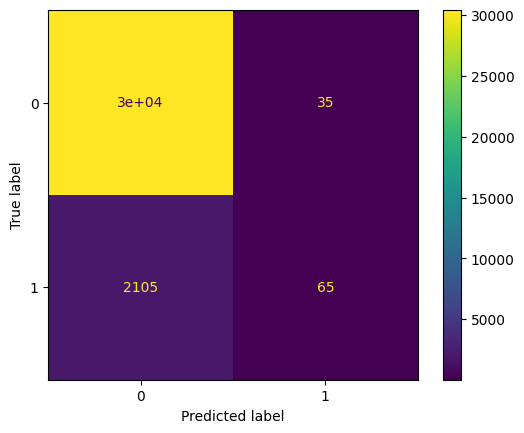

In [144]:
# Logistic Regression
NewPredictDF(LR_Model, "Logistic Regression") 

- Decision Tree

Decision Tree model accuracy with default threshold: 93.44%
Decision Tree model recall with default threshold: 3.87%
Decision Tree model accuracy with custom threshold: 89.43%
Decision Tree model recall with custom threshold: 94.73%
Decision Tree model confusion Matrix: 
 [[28569  1856]
 [ 1590   580]]


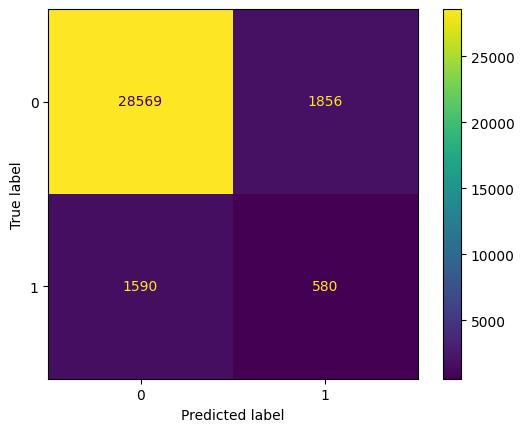

In [145]:
# Decision Tree
NewPredictPP(DT_Model, "Decision Tree") 

- Random Forest

Random Forest model accuracy with default threshold: 93.44%
Random Forest model recall with default threshold: 3.87%
Random Forest model accuracy with custom threshold: 92.24%
Random Forest model recall with custom threshold: 95.63%
Random Forest model confusion Matrix: 
 [[29229  1196]
 [ 1335   835]]


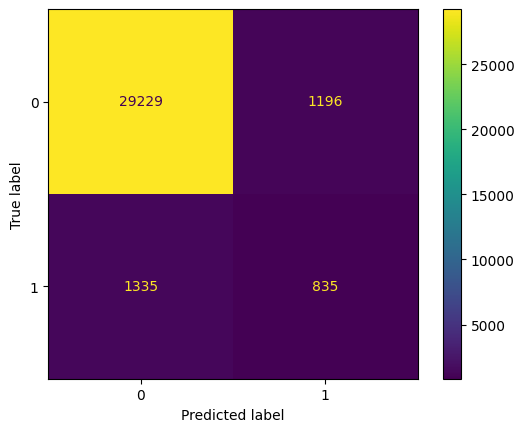

In [146]:
# Random Forest
NewPredictPP(RF_Model, "Random Forest") 

- SVM

SVM model accuracy with default threshold: 93.44%
SVM model recall with default threshold: 3.87%
SVM model accuracy with custom threshold: 93.35%
SVM model recall with custom threshold: 0.83%
SVM model confusion Matrix: 
 [[30409    16]
 [ 2152    18]]


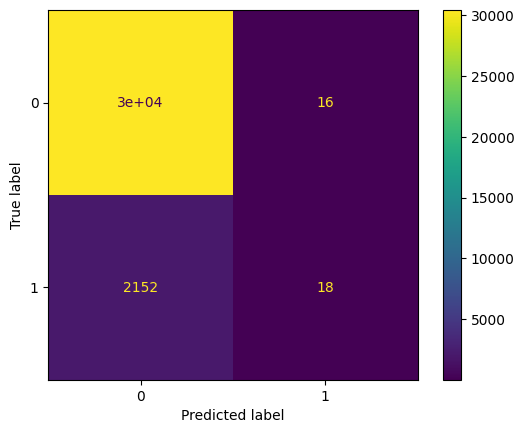

In [147]:
# SVM
NewPredictDF(SVM_Model, "SVM") 

- KNN

KNN model accuracy with default threshold: 93.44%
KNN model recall with default threshold: 3.87%
KNN model accuracy with custom threshold: 91.69%
KNN model recall with custom threshold: 94.67%
KNN model confusion Matrix: 
 [[29371  1054]
 [ 1654   516]]


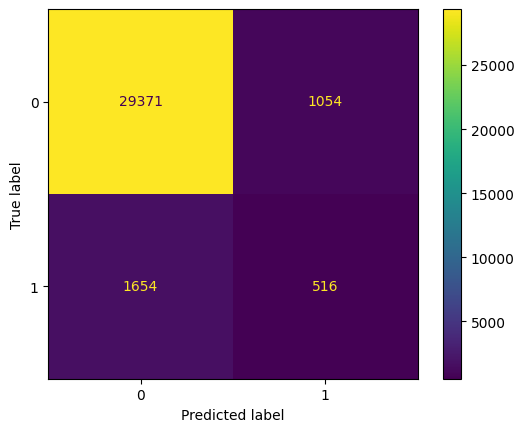

In [148]:
# KNN
NewPredictPP(KNN_Model, "KNN") 